In [1]:
from vectorbtpro import *  

In [2]:
data = vbt.BinanceData.pull('BTCUSDT')

3it [00:02,  1.31it/s, 2017-08-17 → 2024-05-28]

In [3]:
data

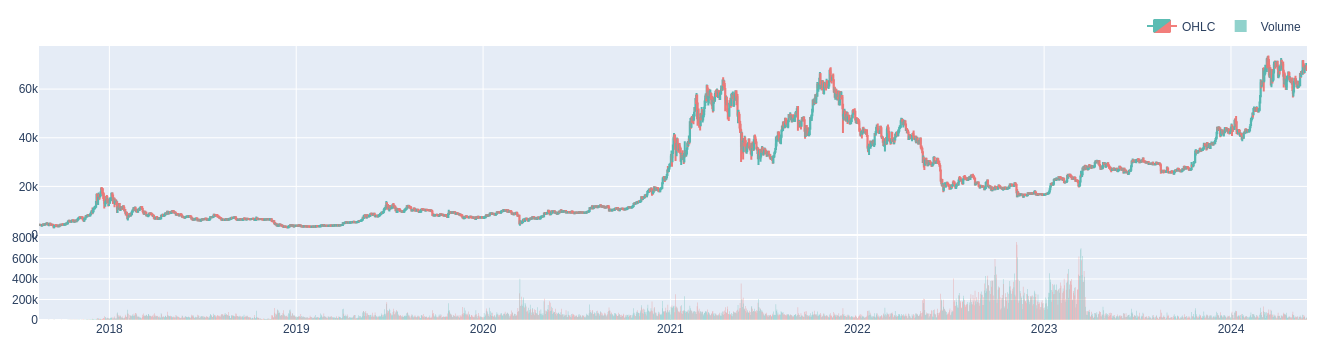

In [5]:
data.plot().show()

In [6]:
data.data['BTCUSDT'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2477 entries, 2017-08-17 00:00:00+00:00 to 2024-05-28 00:00:00+00:00
Freq: D
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                2477 non-null   float64
 1   High                2477 non-null   float64
 2   Low                 2477 non-null   float64
 3   Close               2477 non-null   float64
 4   Volume              2477 non-null   float64
 5   Quote volume        2477 non-null   float64
 6   Trade count         2477 non-null   int64  
 7   Taker base volume   2477 non-null   float64
 8   Taker quote volume  2477 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 193.5 KB


In [9]:
open_price = data.get('Open')
close_price = data.get('Close')

In [10]:
vbt.IF.list_indicators("RSI*")

['vbt:RSI', 'talib:RSI', 'pandas_ta:RSI', 'ta:RSIIndicator']

In [11]:
vbt.indicator("talib:RSI")

vectorbtpro.indicators.factory.talib.RSI

In [13]:
vbt.phelp(vbt.RSI.run)

RSI.run(
    close,
    window=Default(value=14),
    wtype=Default(value='wilder'),
    short_name='rsi',
    hide_params=None,
    hide_default=True,
    **kwargs
):
    Run `RSI` indicator.
    
    * Inputs: `close`
    * Parameters: `window`, `wtype`
    * Outputs: `rsi`
    
    Pass a list of parameter names as `hide_params` to hide their column levels, or True to hide all.
    Set `hide_default` to False to show the column levels of the parameters with a default value.
    
    Other keyword arguments are passed to `RSI.run_pipeline`.


In [14]:
rsi = vbt.RSI.run(open_price)
rsi

In [15]:
rsi.rsi

Open time
2017-08-17 00:00:00+00:00          NaN
2017-08-18 00:00:00+00:00          NaN
2017-08-19 00:00:00+00:00          NaN
2017-08-20 00:00:00+00:00          NaN
2017-08-21 00:00:00+00:00          NaN
                               ...    
2024-05-24 00:00:00+00:00    56.328903
2024-05-25 00:00:00+00:00    57.562398
2024-05-26 00:00:00+00:00    59.148133
2024-05-27 00:00:00+00:00    56.734632
2024-05-28 00:00:00+00:00    58.878335
Freq: D, Name: Open, Length: 2477, dtype: float64

In [16]:
entries = rsi.rsi.vbt.crossed_below(30)  
entries

Open time
2017-08-17 00:00:00+00:00    False
2017-08-18 00:00:00+00:00    False
2017-08-19 00:00:00+00:00    False
2017-08-20 00:00:00+00:00    False
2017-08-21 00:00:00+00:00    False
                             ...  
2024-05-24 00:00:00+00:00    False
2024-05-25 00:00:00+00:00    False
2024-05-26 00:00:00+00:00    False
2024-05-27 00:00:00+00:00    False
2024-05-28 00:00:00+00:00    False
Freq: D, Name: Open, Length: 2477, dtype: bool

In [17]:
exits = rsi.rsi.vbt.crossed_above(70)  
exits

Open time
2017-08-17 00:00:00+00:00    False
2017-08-18 00:00:00+00:00    False
2017-08-19 00:00:00+00:00    False
2017-08-20 00:00:00+00:00    False
2017-08-21 00:00:00+00:00    False
                             ...  
2024-05-24 00:00:00+00:00    False
2024-05-25 00:00:00+00:00    False
2024-05-26 00:00:00+00:00    False
2024-05-27 00:00:00+00:00    False
2024-05-28 00:00:00+00:00    False
Freq: D, Name: Open, Length: 2477, dtype: bool

In [18]:
entries = rsi.rsi_crossed_below(30)
exits = rsi.rsi_crossed_above(70)

In [19]:
def plot_rsi(rsi, entries, exits):
    fig = rsi.plot()
    entries.vbt.signals.plot_as_entries(rsi.rsi, fig=fig)
    exits.vbt.signals.plot_as_exits(rsi.rsi, fig=fig)
    return fig

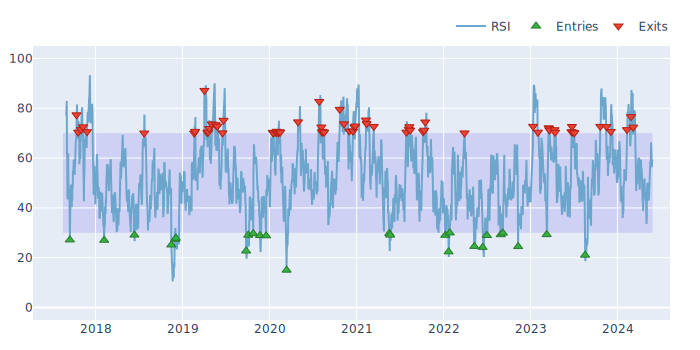

In [20]:
plot_rsi(rsi, entries, exits).show_svg()

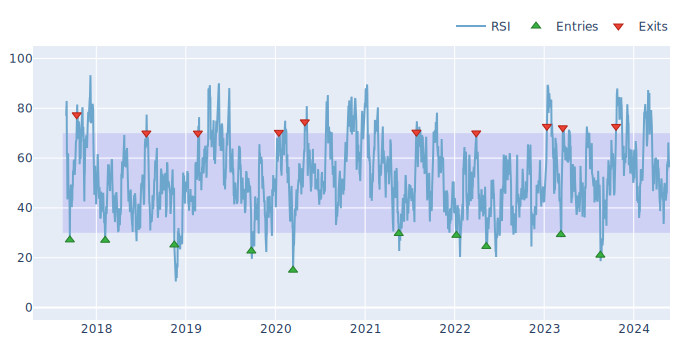

In [21]:
clean_entries, clean_exits = entries.vbt.signals.clean(exits)

plot_rsi(rsi, clean_entries, clean_exits).show_svg()

In [22]:
clean_entries.vbt.signals.total()

10

In [23]:
clean_exits.vbt.signals.total()

10

In [24]:
ranges = clean_entries.vbt.signals.between_ranges(target=clean_exits)
ranges.duration.mean(wrap_kwargs=dict(to_timedelta=True))

Timedelta('92 days 09:36:00')

In [29]:
pf = vbt.Portfolio.from_signals(
    close=close_price, 
    entries=clean_entries, 
    exits=clean_exits,
    size=100,
    size_type='value',
    init_cash='auto'
)
pf

In [30]:
pf.stats()

Start Index                    2017-08-17 00:00:00+00:00
End Index                      2024-05-28 00:00:00+00:00
Total Duration                        2477 days 00:00:00
Start Value                                        100.0
Min Value                                      97.185676
Max Value                                     204.930432
End Value                                     204.930432
Total Return [%]                              104.930432
Benchmark Return [%]                         1494.836269
Position Coverage [%]                          37.303189
Max Gross Exposure [%]                             100.0
Max Drawdown [%]                               46.385941
Max Drawdown Duration                 2056 days 00:00:00
Total Orders                                          20
Total Fees Paid                                      0.0
Total Trades                                          10
Win Rate [%]                                        70.0
Best Trade [%]                 

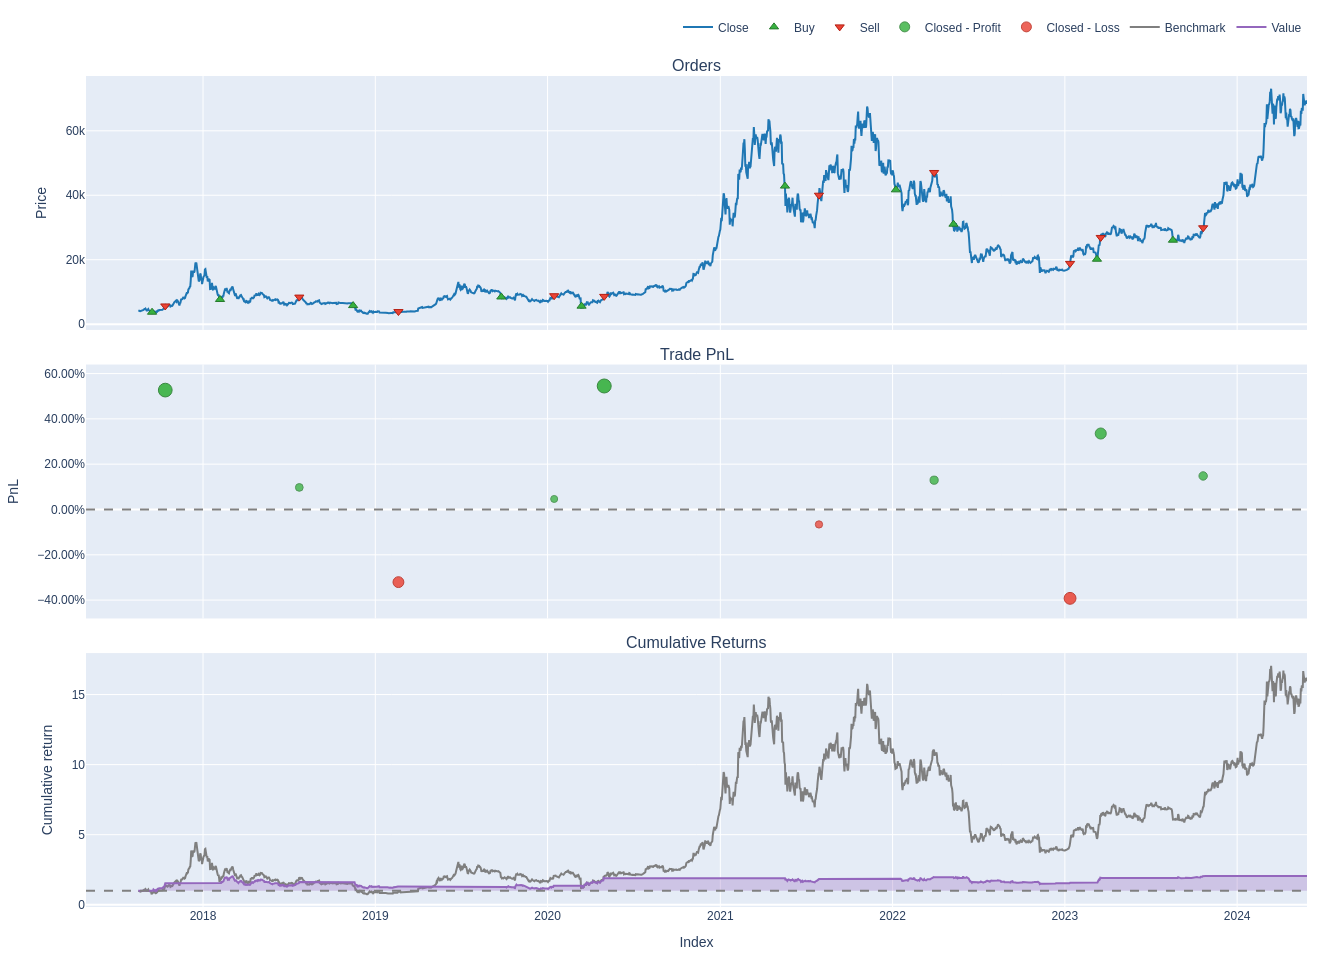

In [33]:
pf.plot(settings=dict(bm_returns=False)).show()

In [34]:
def test_rsi(window=14, wtype="wilder", lower_th=30, upper_th=70):
    rsi = vbt.RSI.run(open_price, window=window, wtype=wtype)
    entries = rsi.rsi_crossed_below(lower_th)
    exits = rsi.rsi_crossed_above(upper_th)
    pf = vbt.Portfolio.from_signals(
        close=close_price, 
        entries=entries, 
        exits=exits,
        size=100,
        size_type='value',
        init_cash='auto')
    return pf.stats([
        'total_return', 
        'total_trades', 
        'win_rate', 
        'expectancy'
    ])

In [35]:
test_rsi()

Total Return [%]    104.930432
Total Trades                10
Win Rate [%]              70.0
Expectancy           10.493043
dtype: object

In [36]:
test_rsi(lower_th=20, upper_th=80)

Total Return [%]    33.327204
Total Trades                3
Win Rate [%]        66.666667
Expectancy          12.482215
dtype: object

In [37]:
from itertools import product

lower_ths = range(20, 31)
upper_ths = range(70, 81)
th_combs = list(product(lower_ths, upper_ths))
len(th_combs)

121

In [38]:
comb_stats = [
    test_rsi(lower_th=lower_th, upper_th=upper_th)
    for lower_th, upper_th in th_combs
]

In [40]:
comb_stats_df = pd.DataFrame(comb_stats)
print(comb_stats_df)

     Total Return [%]  Total Trades  Win Rate [%]  Expectancy
0           35.549015             4     75.000000   11.603979
1           48.604895             4     75.000000   15.801973
2           45.784747             4     75.000000   14.885113
3           42.262424             4     75.000000   14.103681
4           42.262424             4     75.000000   14.103681
..                ...           ...           ...         ...
116        111.053240             7     71.428571   15.864749
117        122.832510             7     71.428571   17.547501
118        100.664249             6     66.666667   16.777375
119         47.504409             5     60.000000   10.843258
120         42.119528             5     60.000000    9.978393

[121 rows x 4 columns]


In [46]:
comb_stats_df.index = pd.MultiIndex.from_tuples(
    th_combs, 
    names=['lower_th', 'upper_th'])
comb_stats_df

Total Return [%]  Total Trades  Win Rate [%]  Expectancy
lower_th upper_th                                                          
20       70               35.549015             4     75.000000   11.603979
         71               48.604895             4     75.000000   15.801973
         72               45.784747             4     75.000000   14.885113
         73               42.262424             4     75.000000   14.103681
         74               42.262424             4     75.000000   14.103681
...                             ...           ...           ...         ...
30       76              111.053240             7     71.428571   15.864749
         77              122.832510             7     71.428571   17.547501
         78              100.664249             6     66.666667   16.777375
         79               47.504409             5     60.000000   10.843258
         80               42.119528             5     60.000000    9.978393

[121 rows x 4 columns]

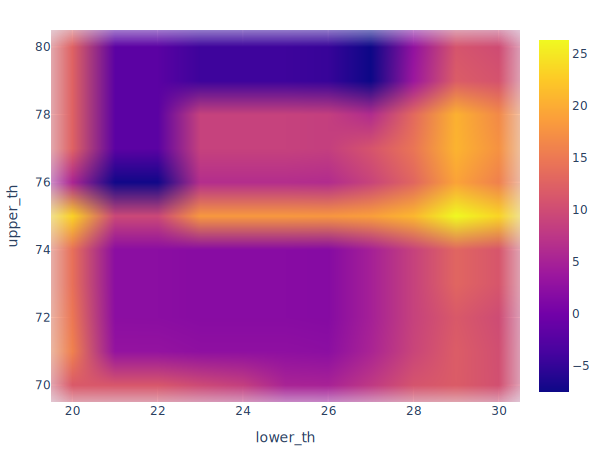

In [47]:
comb_stats_df['Expectancy'].vbt.heatmap().show_svg()

In [48]:
windows = list(range(8, 21))
wtypes = ["simple", "exp", "wilder"]
lower_ths = list(range(20, 31))
upper_ths = list(range(70, 81))

In [49]:
rsi = vbt.RSI.run(
    open_price, 
    window=windows, 
    wtype=wtypes, 
    param_product=True)
rsi.rsi.columns

MultiIndex([( 8, 'simple'),
            ( 8,    'exp'),
            ( 8, 'wilder'),
            ( 9, 'simple'),
            ( 9,    'exp'),
            ( 9, 'wilder'),
            (10, 'simple'),
            (10,    'exp'),
            (10, 'wilder'),
            (11, 'simple'),
            (11,    'exp'),
            (11, 'wilder'),
            (12, 'simple'),
            (12,    'exp'),
            (12, 'wilder'),
            (13, 'simple'),
            (13,    'exp'),
            (13, 'wilder'),
            (14, 'simple'),
            (14,    'exp'),
            (14, 'wilder'),
            (15, 'simple'),
            (15,    'exp'),
            (15, 'wilder'),
            (16, 'simple'),
            (16,    'exp'),
            (16, 'wilder'),
            (17, 'simple'),
            (17,    'exp'),
            (17, 'wilder'),
            (18, 'simple'),
            (18,    'exp'),
            (18, 'wilder'),
            (19, 'simple'),
            (19,    'exp'),
            (19, 'wi

In [50]:
lower_ths_prod, upper_ths_prod = zip(*product(lower_ths, upper_ths))
print(len(lower_ths_prod))
print(len(upper_ths_prod))

121
121


In [51]:
lower_th_index = vbt.Param(lower_ths_prod, name='lower_th')
entries = rsi.rsi_crossed_below(lower_th_index)
entries.columns

MultiIndex([(20,  8, 'simple'),
            (20,  8,    'exp'),
            (20,  8, 'wilder'),
            (20,  9, 'simple'),
            (20,  9,    'exp'),
            (20,  9, 'wilder'),
            (20, 10, 'simple'),
            (20, 10,    'exp'),
            (20, 10, 'wilder'),
            (20, 11, 'simple'),
            ...
            (30, 17, 'wilder'),
            (30, 18, 'simple'),
            (30, 18,    'exp'),
            (30, 18, 'wilder'),
            (30, 19, 'simple'),
            (30, 19,    'exp'),
            (30, 19, 'wilder'),
            (30, 20, 'simple'),
            (30, 20,    'exp'),
            (30, 20, 'wilder')],
           names=['lower_th', 'rsi_window', 'rsi_wtype'], length=4719)

In [59]:
upper_th_index = vbt.Param(upper_ths_prod, name='upper_th')
exits = rsi.rsi_crossed_above(upper_th_index)
exits.columns

MultiIndex([(70,  8, 'simple'),
            (70,  8,    'exp'),
            (70,  8, 'wilder'),
            (70,  9, 'simple'),
            (70,  9,    'exp'),
            (70,  9, 'wilder'),
            (70, 10, 'simple'),
            (70, 10,    'exp'),
            (70, 10, 'wilder'),
            (70, 11, 'simple'),
            ...
            (80, 17, 'wilder'),
            (80, 18, 'simple'),
            (80, 18,    'exp'),
            (80, 18, 'wilder'),
            (80, 19, 'simple'),
            (80, 19,    'exp'),
            (80, 19, 'wilder'),
            (80, 20, 'simple'),
            (80, 20,    'exp'),
            (80, 20, 'wilder')],
           names=['upper_th', 'rsi_window', 'rsi_wtype'], length=4719)

In [60]:
pf = vbt.Portfolio.from_signals(
    close=close_price, 
    entries=entries, 
    exits=exits,
    size=100,
    size_type='value',
    init_cash='auto'
)
pf

In [61]:
stats_df = pf.stats([
    'total_return', 
    'total_trades', 
    'win_rate', 
    'expectancy'
], agg_func=None)
print(stats_df)

                                        Total Return [%]  Total Trades  \
lower_th upper_th rsi_window rsi_wtype                                   
20       70       8          simple            25.605124            45   
                             exp               60.907787            39   
                             wilder            87.205486            15   
                  9          simple           -25.437307            32   
                             exp               40.478551            32   
...                                                  ...           ...   
30       80       19         exp               88.772041            10   
                             wilder             0.188710             4   
                  20         simple           -11.933723             7   
                             exp               63.430822            10   
                             wilder            54.638319             4   

                                     

In [62]:
print(pf.getsize())

13.2 MB


In [63]:
np.product(pf.wrapper.shape) * 8 / 1024 / 1024

89.1797103881836

In [64]:
stats_df['Expectancy'].groupby('rsi_window').mean()

rsi_window
8      1.677621
9      1.679916
10     1.021489
11     0.821341
12     1.351890
13     2.877325
14     3.202364
15     5.195897
16     7.748811
17    10.219641
18    11.349674
19    12.673119
20    12.900804
Name: Expectancy, dtype: float64

In [65]:
print(stats_df.sort_values(by='Expectancy', ascending=False).head())

                                        Total Return [%]  Total Trades  \
lower_th upper_th rsi_window rsi_wtype                                   
23       80       20         wilder           187.478208             2   
24       80       20         wilder           187.478208             2   
22       80       20         wilder           187.478208             2   
21       80       20         wilder           187.478208             2   
25       80       20         wilder           188.924208             3   

                                        Win Rate [%]  Expectancy  
lower_th upper_th rsi_window rsi_wtype                            
23       80       20         wilder            100.0   93.739104  
24       80       20         wilder            100.0   93.739104  
22       80       20         wilder            100.0   93.739104  
21       80       20         wilder            100.0   93.739104  
25       80       20         wilder            100.0   62.974736  


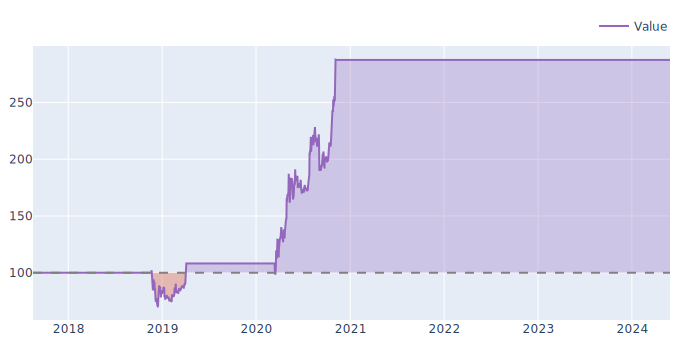

In [66]:
pf[(22, 80, 20, "wilder")].plot_value().show_svg()

In [67]:
data = vbt.BinanceData.pull(['BTCUSDT', 'ETHUSDT'])

  0%|          | 0/2 [00:02<?, ?it/s, symbol=BTCUSDT]

3it [00:02,  1.15it/s, 2017-08-17 → 2024-05-28]

In [71]:
open_price = data.get('Open')
close_price = data.get('Close')

In [72]:
rsi = vbt.RSI.run(
    open_price, 
    window=windows, 
    wtype=wtypes, 
    param_product=True)
entries = rsi.rsi_crossed_below(lower_th_index)
exits = rsi.rsi_crossed_above(upper_th_index)
pf = vbt.Portfolio.from_signals(
    close=close_price, 
    entries=entries, 
    exits=exits,
    size=100,
    size_type='value',
    init_cash='auto'
)
stats_df = pf.stats([
    'total_return', 
    'total_trades', 
    'win_rate', 
    'expectancy'
], agg_func=None)

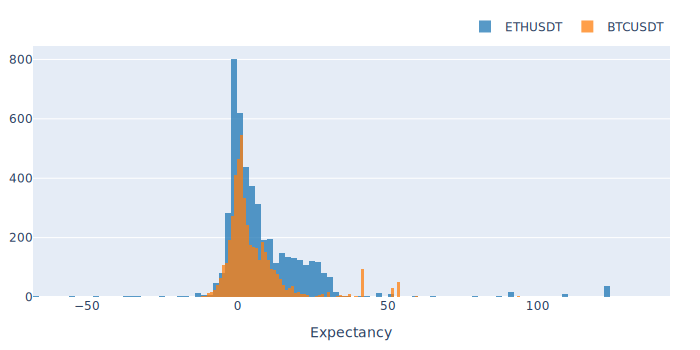

In [73]:
eth_mask = stats_df.index.get_level_values('symbol') == 'ETHUSDT'
btc_mask = stats_df.index.get_level_values('symbol') == 'BTCUSDT'
pd.DataFrame({
    'ETHUSDT': stats_df[eth_mask]['Expectancy'].values,
    'BTCUSDT': stats_df[btc_mask]['Expectancy'].values
}).vbt.histplot(xaxis=dict(title="Expectancy")).show_svg()